# Conseguimos los datos 

Importamos el dataset de piedra, papel y tijeras a la carpeta temporal:

In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/learning-datasets/rps.zip \
    -O /tmp/rps.zip


!wget --no-check-certificate \
    https://storage.googleapis.com/learning-datasets/rps-test-set.zip \
    -O /tmp/rps-test-set.zip

--2023-05-16 12:00:19--  https://storage.googleapis.com/learning-datasets/rps.zip
Resolviendo storage.googleapis.com (storage.googleapis.com)... 216.58.215.144, 216.58.215.176, 172.217.168.176, ...
Conectando con storage.googleapis.com (storage.googleapis.com)[216.58.215.144]:443... conectado.
Petición HTTP enviada, esperando respuesta... 200 OK
Longitud: 200682221 (191M) [application/zip]
Guardando como: ‘/tmp/rps.zip’

/tmp/rps.zip        100%[===================>] 191,38M  9,35MB/s    en 19s     

2023-05-16 12:00:38 (10,2 MB/s) - ‘/tmp/rps.zip’ guardado [200682221/200682221]

--2023-05-16 12:00:38--  https://storage.googleapis.com/learning-datasets/rps-test-set.zip
Resolviendo storage.googleapis.com (storage.googleapis.com)... 142.250.200.112, 216.58.215.176, 142.250.178.176, ...
Conectando con storage.googleapis.com (storage.googleapis.com)[142.250.200.112]:443... conectado.
Petición HTTP enviada, esperando respuesta... 200 OK
Longitud: 29516758 (28M) [application/zip]
Guardando c

Extraemos los datos y los descomprimimos:



In [2]:
import os
import zipfile

local_zip = '/tmp/rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

local_zip = '/tmp/rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

Creamos las carpetas para trabajar de forma organizada y las llenamos con los elementos correspondientes

In [3]:
rock_dir = os.path.join('/tmp/rps/rock')
paper_dir = os.path.join('/tmp/rps/paper')
scissors_dir = os.path.join('/tmp/rps/scissors')

print('total training rock images:', len(os.listdir(rock_dir)))
print('total training paper images:', len(os.listdir(paper_dir)))
print('total training scissors images:', len(os.listdir(scissors_dir)))


total training rock images: 840
total training paper images: 840
total training scissors images: 840


In [4]:
rock_files = os.listdir(rock_dir)
print(rock_files[:10])

paper_files = os.listdir(paper_dir)
print(paper_files[:10])

scissors_files = os.listdir(scissors_dir)
print(scissors_files[:10])

['rock05ck01-075.png', 'rock07-k03-024.png', 'rock04-078.png', 'rock03-097.png', 'rock03-046.png', 'rock07-k03-089.png', 'rock06ck02-073.png', 'rock01-013.png', 'rock02-051.png', 'rock02-080.png']
['paper05-009.png', 'paper01-075.png', 'paper02-037.png', 'paper03-104.png', 'paper04-062.png', 'paper07-020.png', 'paper06-113.png', 'paper07-104.png', 'paper06-037.png', 'paper05-075.png']
['scissors03-098.png', 'testscissors01-057.png', 'testscissors02-015.png', 'testscissors01-086.png', 'scissors03-049.png', 'scissors02-022.png', 'scissors01-060.png', 'scissors03-111.png', 'scissors04-077.png', 'testscissors02-069.png']


# Data Augmentation

Definimos las transformaciones a aplicar

Enlace con explicación de cada una de las transformaciones 
https://www.analyticsvidhya.com/blog/2020/08/image-augmentation-on-the-fly-using-keras-imagedatagenerator/

In [5]:
!pip install Keras-Preprocessing

Defaulting to user installation because normal site-packages is not writeable


In [6]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = "/tmp/rps/"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "/tmp/rps-test-set/"
validation_datagen = ImageDataGenerator(rescale = 1./255)



2023-05-16 12:00:47.670746: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-05-16 12:00:47.683508: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-16 12:00:47.789886: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-16 12:00:47.791501: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-16 12:00:49.358860: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

Iterador para generar datos sobre directorios

Enlace donde se explican los parámetros: https://vijayabhaskar96.medium.com/tutorial-image-classification-with-keras-flow-from-directory-and-generators-95f75ebe5720

In [7]:
train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [8]:
rock_dir = os.path.join('/tmp/rps/rock')
paper_dir = os.path.join('/tmp/rps/paper')
scissors_dir = os.path.join('/tmp/rps/scissors')

print('total training rock images:', len(os.listdir(rock_dir)))
print('total training paper images:', len(os.listdir(paper_dir)))
print('total training scissors images:', len(os.listdir(scissors_dir)))


total training rock images: 840
total training paper images: 840
total training scissors images: 840


# Creación del Modelo

Diseño del modelo

In [9]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    #tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    #tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])



model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

Compilación del Modelo, Entrenamiento del Modelo y Guardado de Pesos de los parámetros

In [10]:
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [11]:
history = model.fit(
    train_generator,
    epochs = 20,
    validation_data = validation_generator,
    verbose = 2)

Epoch 1/20


2023-05-16 12:00:53.611430: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2023-05-16 12:01:38.846586: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


20/20 - 48s - loss: 1.7386 - accuracy: 0.3306 - val_loss: 1.0887 - val_accuracy: 0.3333 - 48s/epoch - 2s/step
Epoch 2/20
20/20 - 46s - loss: 1.0952 - accuracy: 0.3885 - val_loss: 1.0541 - val_accuracy: 0.4328 - 46s/epoch - 2s/step
Epoch 3/20
20/20 - 46s - loss: 1.0680 - accuracy: 0.4631 - val_loss: 1.0420 - val_accuracy: 0.3333 - 46s/epoch - 2s/step
Epoch 4/20
20/20 - 46s - loss: 0.9620 - accuracy: 0.5056 - val_loss: 0.7731 - val_accuracy: 0.6129 - 46s/epoch - 2s/step
Epoch 5/20
20/20 - 45s - loss: 0.9108 - accuracy: 0.5813 - val_loss: 0.5419 - val_accuracy: 0.9032 - 45s/epoch - 2s/step
Epoch 6/20
20/20 - 27s - loss: 0.9748 - accuracy: 0.6456 - val_loss: 0.5308 - val_accuracy: 0.8065 - 27s/epoch - 1s/step
Epoch 7/20
20/20 - 24s - loss: 0.7534 - accuracy: 0.6972 - val_loss: 0.5864 - val_accuracy: 0.7715 - 24s/epoch - 1s/step
Epoch 8/20
20/20 - 23s - loss: 0.6319 - accuracy: 0.7171 - val_loss: 0.3523 - val_accuracy: 0.8387 - 23s/epoch - 1s/step
Epoch 9/20
20/20 - 23s - loss: 0.6225 - acc

Hacemos un grafico con la precisión de entrenamiento y validación:

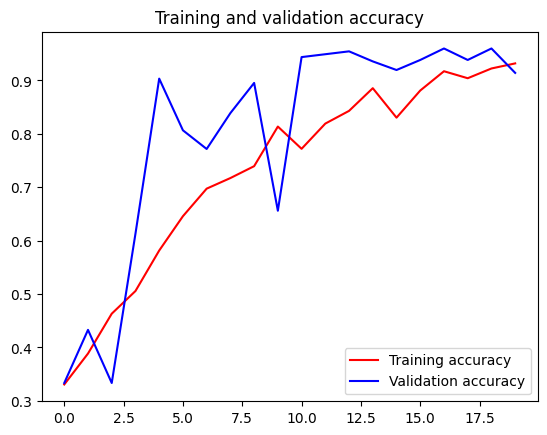

<Figure size 640x480 with 0 Axes>

In [12]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

# Uso del modelo para predecir imágenes

In [1]:
# import numpy as np
# from google.colab import files
# from keras.preprocessing import image

# uploaded = files.upload()

# for fn in uploaded.keys():
 
#   # predicting images
#   path = fn
#   img = image.load_img(path, target_size=(150, 150))
#   x = image.img_to_array(img)
#   x = np.expand_dims(x, axis=0)

#   images = np.vstack([x])
#   classes = model.predict(images, batch_size=10)
#   print(fn)
#   print(classes)